# Motivation

The new specification for updating Landing Craft Vehicle Personnel (LCVP) MK5 involves the landing craft reaching higher speeds and further distances to allow for over the horizon deployment at sea. The craft is physically capable of reaching these speeds, however the impact of hitting waves is very hazardous to the commandos inside. The impact is enough to break bones and slip spinal disks and has been measured as high as 18g, therefore shock absorption is necessary to protect the commandos. A G-force of 9g is high enough to make most people blackout after seconds. Active shock absorption allows for lower forces on the commandos, giving them better operational capability after traveling in the craft.

In this project I am looking to analyse the g-forces experienced by the landing craft. The data was gathered by attaching a phone to the floor of the inside of the landing craft and reading accelerometer data. There were 5 attempts to gather data, but only one was successful which is the run I am analysing here.

In [1]:
import numpy as np
import scipy as sp
import scipy.signal as signal
import astropy
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Import and summerise data

This data is from just over two muinites of sample time. Other runs for gathering data did not correctly run because of salt water activating the touch screen and the app we used to measure the acceleromater data.


Even on this calm day we still measured a maximum of 5.1g which is the maximum sustained g force an average human body can withstand. The y direction represents the direction of travel of the craft, x is perpendicular to this but still in the plane of the ocean, and z direction is vertical. Negative forces indicate acceleration in the opposite direction. As the minimum (absolute) acceleration was just 0.03g, even when the boat was in freefall there is still a small measured acceleartion possibly from; low precision of the accelerometer at small values, air resistance, or general noise in the data.

In [2]:
raw_data = pd.read_csv("data catch from ORC.csv")
raw_data.describe()

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
count,59462.00,59462.00,59462.00,59462.00,59462.00
mean,74.41,0.08,0.84,9.83,10.35
std,42.95,2.29,1.86,4.02,3.88
min,0.02,-31.14,-25.08,-24.53,0.34
25%,37.22,-1.00,-0.02,7.55,8.00
50%,74.41,0.05,1.08,9.83,10.09
75%,111.60,1.08,2.04,12.00,12.35
max,148.81,33.52,10.52,46.74,50.21


# All data

The data seem regular without obvious outliers. The frequencies present in the data seem regular, suggesting the data can be used as cropped to 130s of data.

[]

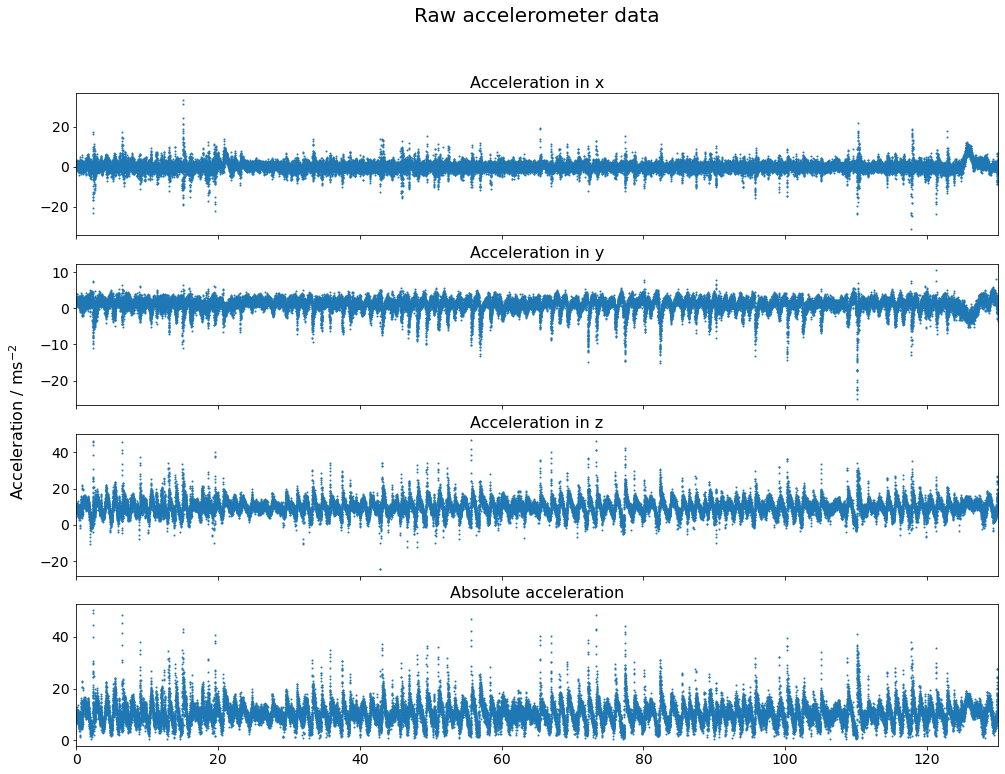

In [3]:
all_raw_data = raw_data[raw_data['Time (s)'].between(0,130)]

fig,axs = plt.subplots(4,1,figsize=(16,12), sharex=True)
fig.suptitle("Raw accelerometer data", fontsize=20)
axs[0].set_xlim(0,130)
axs[1].set_xlim(0,130)
axs[2].set_xlim(0,130)
axs[3].set_xlim(0,130)

axs[0].set_title("Acceleration in x", fontsize=16)
axs[1].set_title("Acceleration in y", fontsize=16)
axs[2].set_title("Acceleration in z", fontsize=16)
axs[3].set_title("Absolute acceleration", fontsize=16)

axs[0].scatter(all_raw_data['Time (s)'], all_raw_data['Acceleration x (m/s^2)'], s=1)
axs[1].scatter(all_raw_data['Time (s)'], all_raw_data['Acceleration y (m/s^2)'], s=1)
axs[2].scatter(all_raw_data['Time (s)'], all_raw_data['Acceleration z (m/s^2)'], s=1)
axs[3].scatter(all_raw_data['Time (s)'], all_raw_data['Absolute acceleration (m/s^2)'], s=1)

axs[0].tick_params(labelsize=14)
axs[1].tick_params(labelsize=14)
axs[2].tick_params(labelsize=14)
axs[3].tick_params(labelsize=14)

plt.xticks(fontsize=14)
fig.subplots_adjust(hspace=0.2, left=.1)
fig.text(0.04, 0.5, 'Acceleration / $\mathregular{ms^{-2}}$', va='center', rotation='vertical', fontsize=16)

plt.savefig("Raw accelerometer data.png", dpi=300)
plt.plot()

# Zoomed in view of data

Data is clearly very noisy which could be because the measurment device had low precision in its measurments. As a result, this data needs a denoising algorythm applied to allow for better prediction. Impact spike are obvious and the data seems to contain regular frequencies of impacts. 

[]

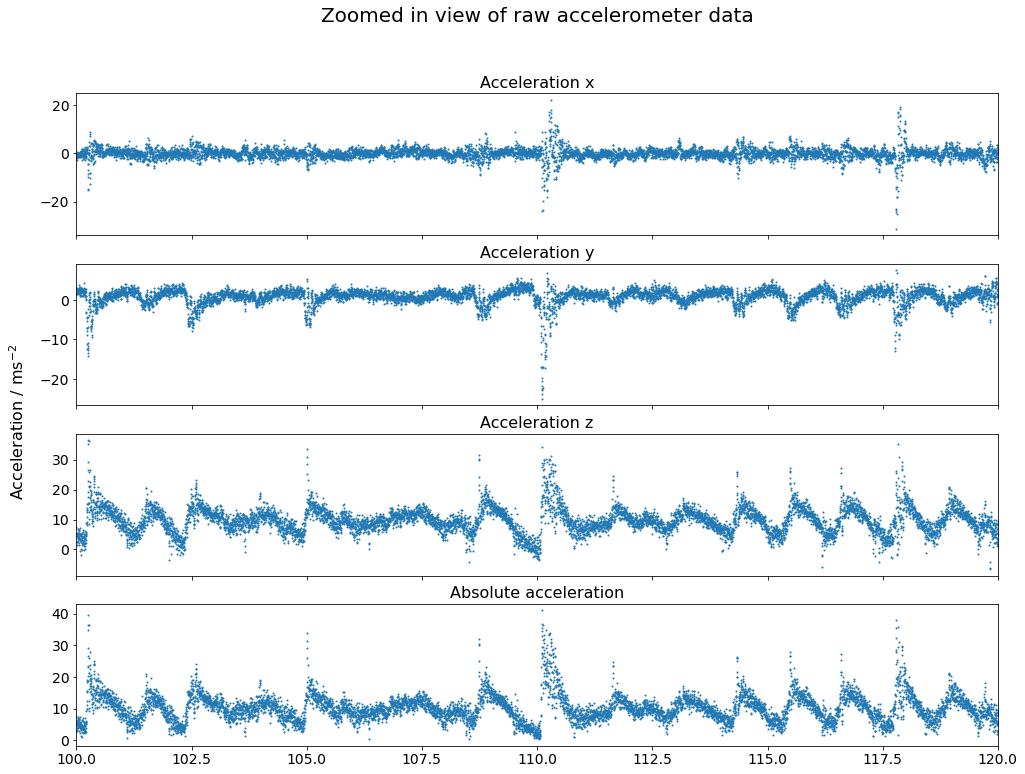

In [4]:
#Zoomed in view of raw data
min_time = 100
max_time = 120

zoomed_raw_data = raw_data[raw_data['Time (s)'].between(min_time,max_time)]

fig,axs = plt.subplots(4,1,figsize=(16,12), sharex=True)

fig.suptitle("Zoomed in view of raw accelerometer data", fontsize=20)

axs[0].set_xlim(min_time,max_time)
axs[1].set_xlim(min_time,max_time)
axs[2].set_xlim(min_time,max_time)
axs[3].set_xlim(min_time,max_time)

axs[0].set_title("Acceleration x", fontsize=16)
axs[1].set_title("Acceleration y", fontsize=16)
axs[2].set_title("Acceleration z", fontsize=16)
axs[3].set_title("Absolute acceleration", fontsize=16)

axs[0].scatter(zoomed_raw_data['Time (s)'], zoomed_raw_data['Acceleration x (m/s^2)'], s=1)
axs[1].scatter(zoomed_raw_data['Time (s)'], zoomed_raw_data['Acceleration y (m/s^2)'], s=1)
axs[2].scatter(zoomed_raw_data['Time (s)'], zoomed_raw_data['Acceleration z (m/s^2)'], s=1)
axs[3].scatter(zoomed_raw_data['Time (s)'], zoomed_raw_data['Absolute acceleration (m/s^2)'], s=1)

axs[0].tick_params(labelsize=14)
axs[1].tick_params(labelsize=14)
axs[2].tick_params(labelsize=14)
axs[3].tick_params(labelsize=14)

plt.xticks(fontsize=14)
fig.subplots_adjust(hspace=0.2, left=.1)
fig.text(0.04, 0.5, 'Acceleration / $\mathregular{ms^{-2}}$', va='center', rotation='vertical', fontsize=16)

plt.savefig("Zoomed in view of raw accelerometer data.png", dpi=300)
plt.plot()

# Apply rolling window algorithm for denoising
<br/>
The rolling window algorithm is one of the simplest denoising algorithms. We decided to use it because it keeps our sample size large by only missing the first values of the same length as the window, and because it performed similarly to more complex algorythms. In our implementation we are using a window size of 50 hence only the first 50 datapoints are missing. We notice that there is a slight delay in events happening in the data because of denoising, however if all data is translated in this way this will not impact our frequency analysis. We believe the denoising algorythm is successful.

In [5]:
%%capture
# Apply rolling window denoising
window_size = 50

window = raw_data.loc[:, raw_data.columns!='Time (s)'].rolling(window_size).mean()
window['Time (s)'] = raw_data['Time (s)']
window.drop([i for i in range(0,101)], inplace=False) # Remove first 100 values as they are NaN

In [6]:
# Choose a small section of data to demonstrate denoising
min_time = 65
max_time = 85

zoomed_window_data = window[window['Time (s)'].between(min_time,max_time)]
zoomed_raw_data = raw_data[raw_data['Time (s)'].between(min_time,max_time)]

[]

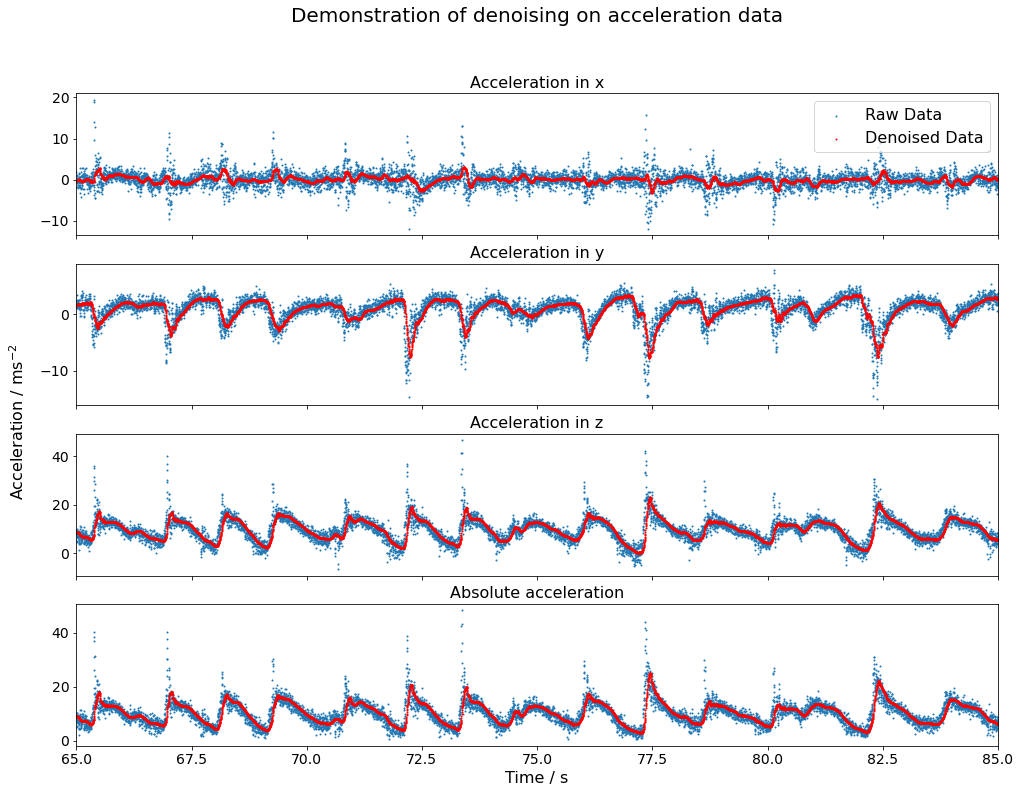

In [7]:
fig,axs = plt.subplots(4,1,figsize=(16,12), sharex=True)

fig.suptitle("Demonstration of denoising on acceleration data", size=20)
fig.subplots_adjust(hspace=0.2, left=.1)

axs[0].set_xlim(min_time,max_time)
axs[1].set_xlim(min_time,max_time)
axs[2].set_xlim(min_time,max_time)
axs[3].set_xlim(min_time,max_time)

axs[0].set_title("Acceleration in x", fontsize=16)
axs[1].set_title("Acceleration in y", fontsize=16)
axs[2].set_title("Acceleration in z", fontsize=16)
axs[3].set_title("Absolute acceleration", fontsize=16)

axs[0].scatter(zoomed_raw_data['Time (s)'], zoomed_raw_data['Acceleration x (m/s^2)'], s=1, label="Raw Data")
axs[1].scatter(zoomed_raw_data['Time (s)'], zoomed_raw_data['Acceleration y (m/s^2)'], s=1)
axs[2].scatter(zoomed_raw_data['Time (s)'], zoomed_raw_data['Acceleration z (m/s^2)'], s=1)
axs[3].scatter(zoomed_raw_data['Time (s)'], zoomed_raw_data['Absolute acceleration (m/s^2)'], s=1)

axs[0].scatter(zoomed_window_data['Time (s)'], zoomed_window_data['Acceleration x (m/s^2)'], s=1, c='r', label="Denoised Data")
axs[1].scatter(zoomed_window_data['Time (s)'], zoomed_window_data['Acceleration y (m/s^2)'], s=1, c='r')
axs[2].scatter(zoomed_window_data['Time (s)'], zoomed_window_data['Acceleration z (m/s^2)'], s=1, c='r')
axs[3].scatter(zoomed_window_data['Time (s)'], zoomed_window_data['Absolute acceleration (m/s^2)'], s=1, c='r')

axs[0].tick_params(labelsize=14)
axs[1].tick_params(labelsize=14)
axs[2].tick_params(labelsize=14)
axs[3].tick_params(labelsize=14)

plt.xticks(fontsize=14)

axs[3].set_xlabel("Time / s",fontsize=16)
fig.text(0.04, 0.5, 'Acceleration / $\mathregular{ms^{-2}}$', va='center', rotation='vertical', fontsize=16)
axs[0].legend(fontsize = 16)

plt.savefig("Demonstration of denoising on acceleration data.png", dpi=300)
plt.plot()

# Frequency analysis of waves present in the dataset

We now perform frequency analysis on the data to analyse the distrubtion of impact frequencies. We can use this data to predict when impacts with the boat and water would occur, and correspond this to metrological wave data. We are using a method caled least-squares spectral analysis (or Lomb-Scargle Perediogram) to generate a frequency profile, this is because our data is not evenly spaced, hence FFT would not work. We crop our plot around an anuglar frequency of 5Hz because it is of the correct order for our observed waves. 

In [8]:
# Perform spectral analysis

freqs = np.logspace(np.log(1.4),np.log(2.5),num=8000)
x = window['Time (s)'][100:]
y = window['Absolute acceleration (m/s^2)'][100:]
signals = signal.lombscargle(x, y, freqs, normalize=True)

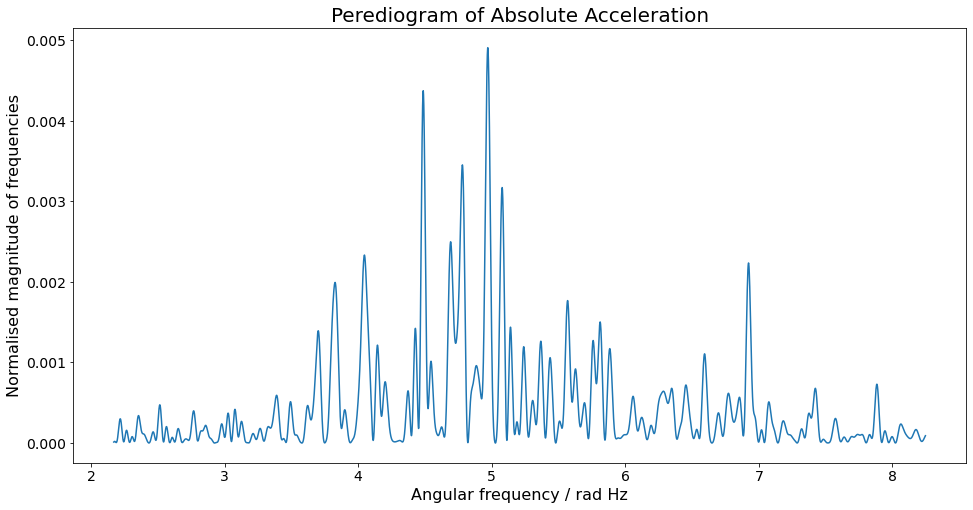

In [9]:
plt.figure(figsize=(16,8))

plt.plot(freqs, signals)

plt.title("Perediogram of Absolute Acceleration", fontsize=20)
plt.xlabel("Angular frequency / rad Hz", fontsize=16)
plt.ylabel("Normalised magnitude of frequencies", fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig("Perediogram of Absolute Acceleration.png", dpi=300)
plt.show()

# Log-Normal fit for wave frequencies

We wanted to see whether we expect there to be a pattern in the frequency data. Accoring to a 2021 paper [1] a log-normal distribution is expected when observing the frequencies of ocean waves. We wanted to see whether this trend could be used to describe our data which would allow a simple transformation between predicted weather data to impact data to allow the craft be informed by metrological data. 


We hand fitted our plot and we believe the log-normal curve to be a good prediction. Higher values don't quite fit because of harmonic effects in the data.

[1] Katalinić, M.; Parunov, J. Comprehensive Wind and Wave Statistics and Extreme Values for Design and Analysis of Marine Structures in the Adriatic Sea. J. Mar. Sci. Eng. 2021, 9, 522. https://doi.org/10.3390/jmse9050522

In [10]:
from scipy.stats import lognorm

def log_normal(x,mu,sigma):
    return (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))*0.00105*x)

mean = 1.51
stdev = 0.15
y=log_normal(freqs, mean, stdev)

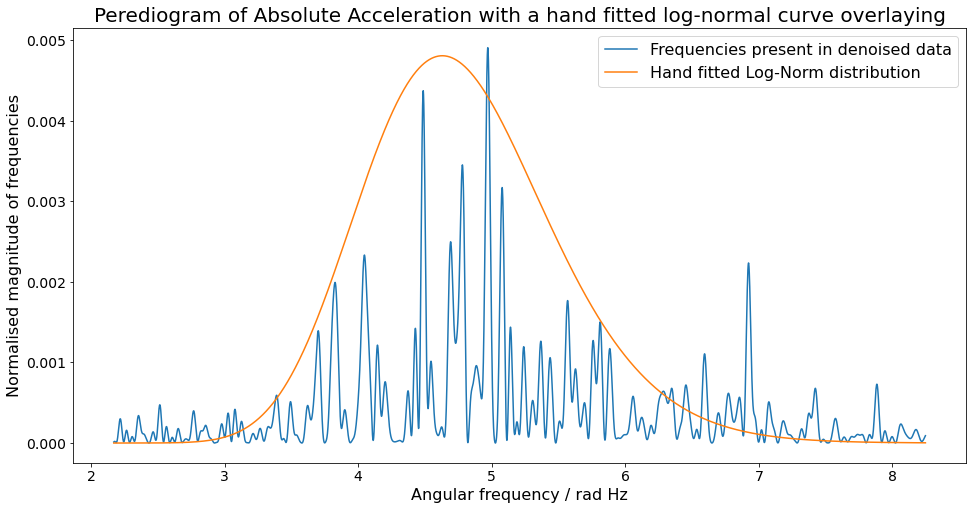

The log-normal distribution has μ=4.53/rad Hz and σ=1.16/rad Hz


In [11]:
plt.figure(figsize=(16,8))

plt.plot(freqs, signals, label="Frequencies present in denoised data")
plt.plot(freqs,y, label="Hand fitted Log-Norm distribution")

plt.title("Perediogram of Absolute Acceleration with a hand fitted log-normal curve overlaying", fontsize=20)

plt.xlabel("Angular frequency / rad Hz", fontsize=16)
plt.ylabel("Normalised magnitude of frequencies", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=16)

plt.savefig("Perediogram of Absolute Acceleration with log-normal fit.png", dpi=300)
plt.show()
print(f"The log-normal distribution has μ={np.e**mean:.2f}/rad Hz and σ={np.e**stdev:.2f}/rad Hz")

# Demonstration of mean frequency 

To verify that our mean frequency is a sensible value I am plotting a sine curve on our smoothed data. This clearly shows that our analysis came with sensible conclusions with a mean frequency that rougly linesup with some impacts.

In [12]:
min_time = 65
max_time = 85
x=np.linspace(min_time, max_time,2000)
y= (np.sin((x-0.5)*(2*np.pi/1.38))*6+np.mean(zoomed_raw_data['Absolute acceleration (m/s^2)']))


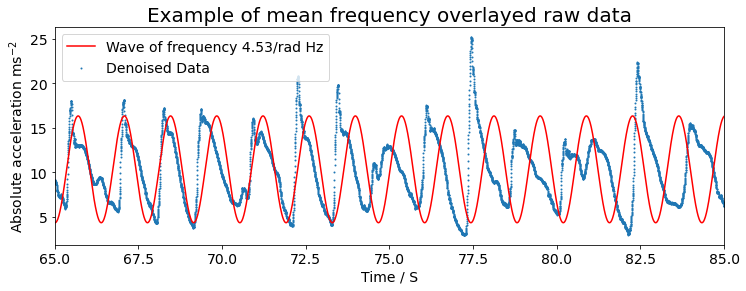

In [13]:
plt.figure(figsize=(12,4))

plt.scatter(zoomed_window_data['Time (s)'], zoomed_window_data['Absolute acceleration (m/s^2)'], s=1, label="Denoised Data")
plt.plot(x,y,color="r", label="Wave of frequency 4.53/rad Hz")

plt.title("Example of mean frequency overlayed raw data", fontsize=20)

plt.xlabel("Time / S", fontsize=14)
plt.ylabel("Absolute acceleration $\mathregular{ms^{-2}}$", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlim(min_time,max_time)

plt.legend(fontsize=14)

plt.savefig("Mean frequency sinewave overlay.png", dpi=300)
plt.show()

# Conclusions

In conclusion we can successfully determine the frequency profile of the waves, and can therefore show that we can use weather data to inform a predictive algorithm. The use of rolling window algorithm is very successful in smoothing out accelerometer data from smartphones, and with more data the log-normal fit could be improved.

# Further work

* More data in different conditions to generalise our foundings better, in different weather conditions, and different speeds. 
* Predict the magnitude of the impacts 
* Predict the direction of the impact to be used with gimbled seats to make the impact pass straight through the commandos spine
* Try fitting saw waves to the data

